In [2]:
#I commenti al codice sono inserinti con in mente un'esposizione dello stesso agli umanisti,
#e l'idea di rendere il codice quantopiù possibile leggibile anche per loro

#Useful libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Database acquisition
fashion_mnist = tf.keras.datasets.fashion_mnist

#Data separation into images and labels for training set and test set
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#No more than one label is assigned to every single image
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Rescaling the data. Images colors are store in a 0-to-255 value range, whereas we need them to be 0-to-1 to work with this code
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_labels[1]

0

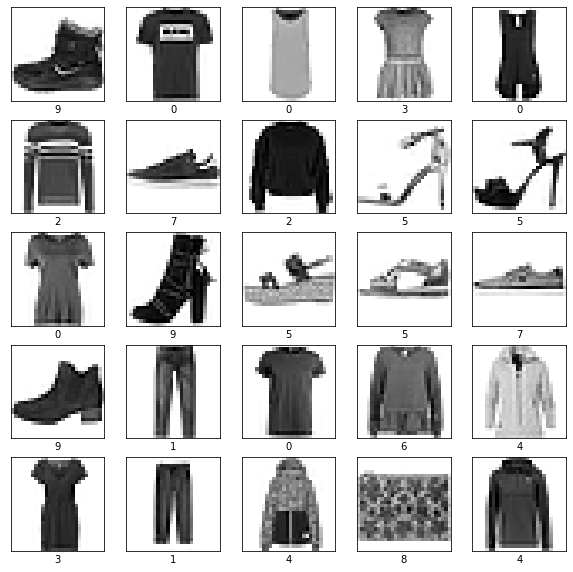

In [15]:
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Creating our model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #This turns every 28x28 square images in a sequence of 28x28 = 784 pixels
    tf.keras.layers.Dense(128, kernel_initializer = "random_uniform")
])

#Packing everything together
model.compile(optimizer='adam', #The method to determine how the net adjusts to results
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #The loss function
              metrics=['accuracy'])

#Let's see our model
model.summary()

In [ ]:
#Training time!
model.fit(train_images, train_labels, epochs=10)

In [ ]:
#Testing the trained model
test_loss, test_acc = model.evaluate(test_images, test_labels)